## Data validation: 
We have investigated the dataset and found that there is no missing values in any cells. 
Some columns are of object type, and after examineing their unique values (ensuring no cleaning was necessary there because of typos or similar), we converted these columns to category type. 
The rest of the columns are either in64 or float64 type which seems appropriate. 



In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('toyota.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [64]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [65]:
possible_categorical_columns = ['model', 'transmission', 'fuelType']
for col in possible_categorical_columns:
    print(data[col].unique())
    data[col] = data[col].astype('category')

data.info()

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']
['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         6738 non-null   category
 1   year          6738 non-null   int64   
 2   price         6738 non-null   int64   
 3   transmission  6738 non-null   category
 4   mileage       6738 non-null   int64   
 5   fuelType      6738 non-null   category
 6   tax           6738 non-null   int64   
 7   mpg           6738 non-null   float64 
 8   engineSize    6738 non-null   float64 
dtypes: category(3), float64(2), int64(4)
memory usage: 336.8 KB


# Exploratory Analysis
- two different types of graphics showing single variables only
- at least one graphic showing two or more variables 
- description of your findings


Target variable is price. We first look at the relationship between price and numerical values. 
Then we investigate the relationship between price and categorical values. 

In [66]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


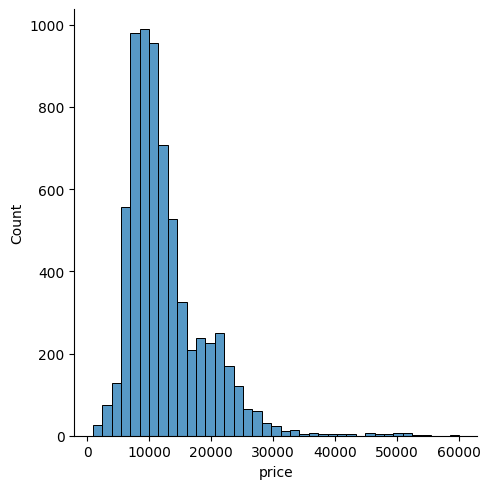

In [67]:
import seaborn as sns
numerical_col = ["year", "mpg", "mileage", "tax", "engineSize"]
categorical_col = ['transmission', 'fuelType', 'model']
sns.displot(data, x="price", binwidth=1500, log_scale=False)

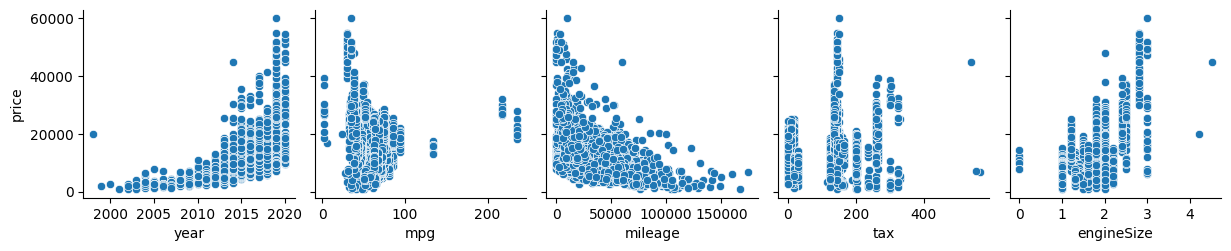

In [ ]:
sns.pairplot(data=data, y_vars="price", x_vars=numerical_col)

<Axes: xlabel='engineSize', ylabel='price'>

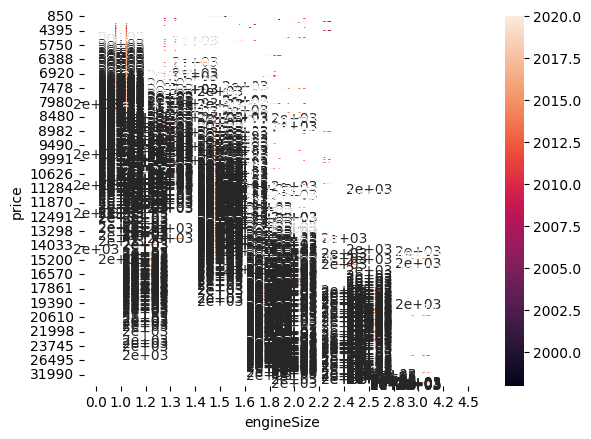

In [ ]:
#need to plot heatmap of numerical variables
data_pivoted = data.pivot_table(index="tax", columns="engineSize" , values="price")
sns.heatmap(data_pivoted, annot=True)

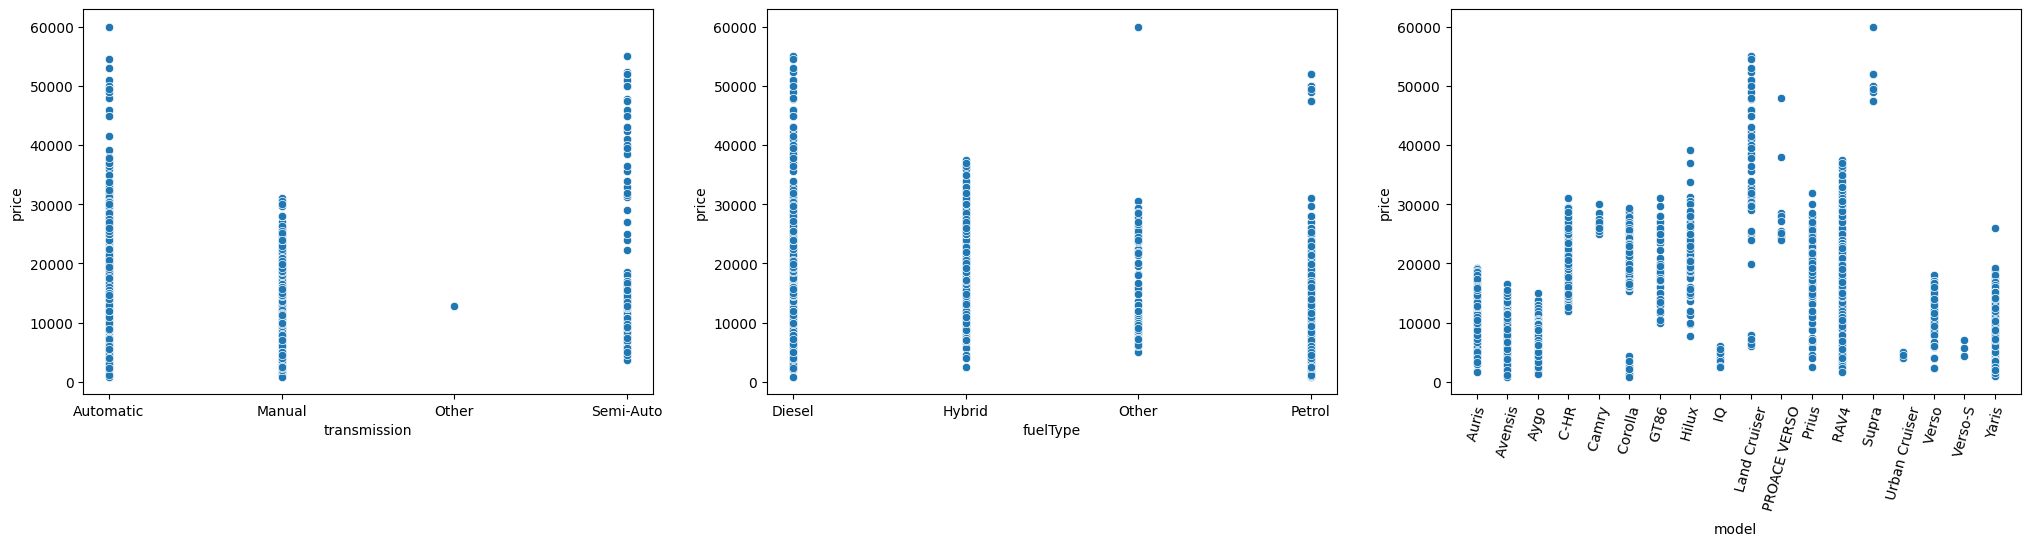

In [ ]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.scatterplot(data=data, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()


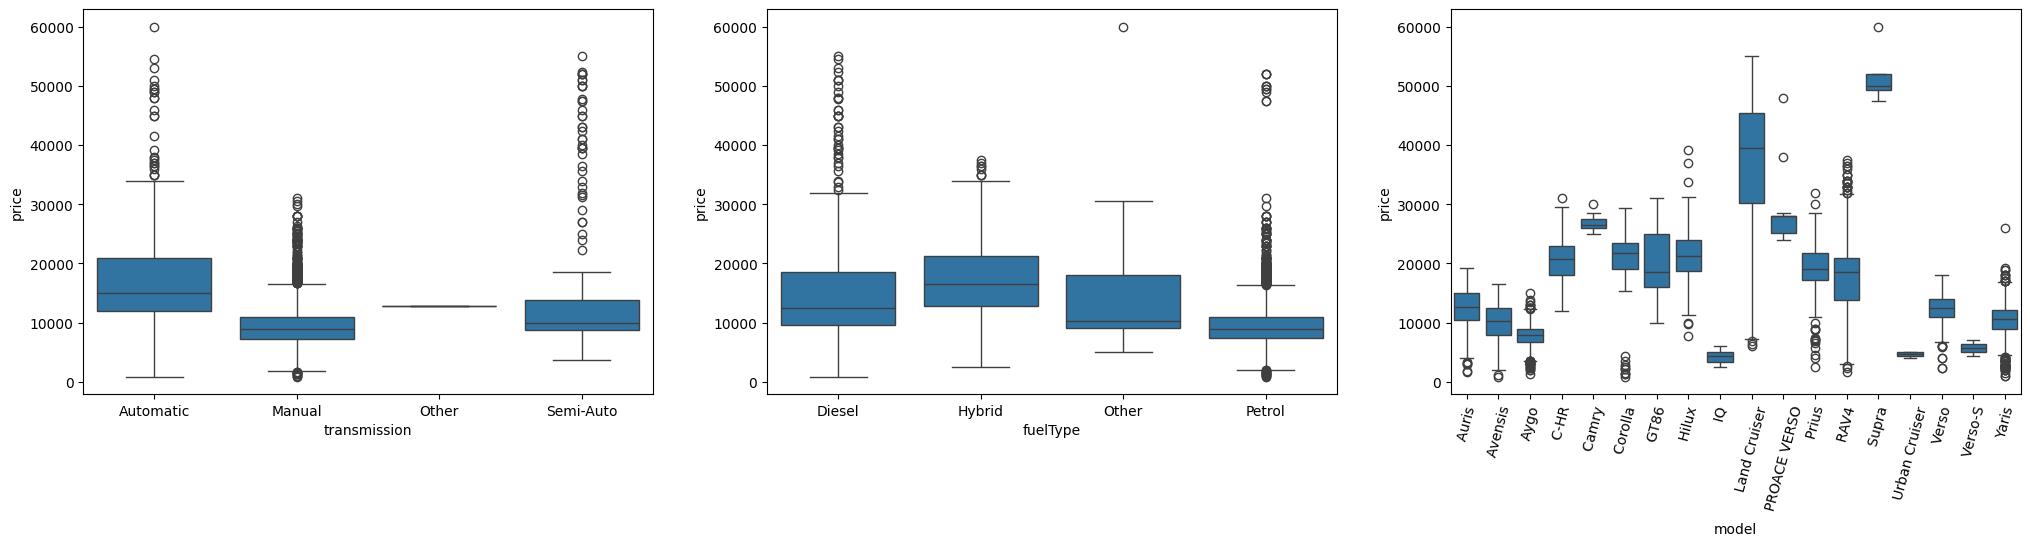

In [ ]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.boxplot(data=data, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()

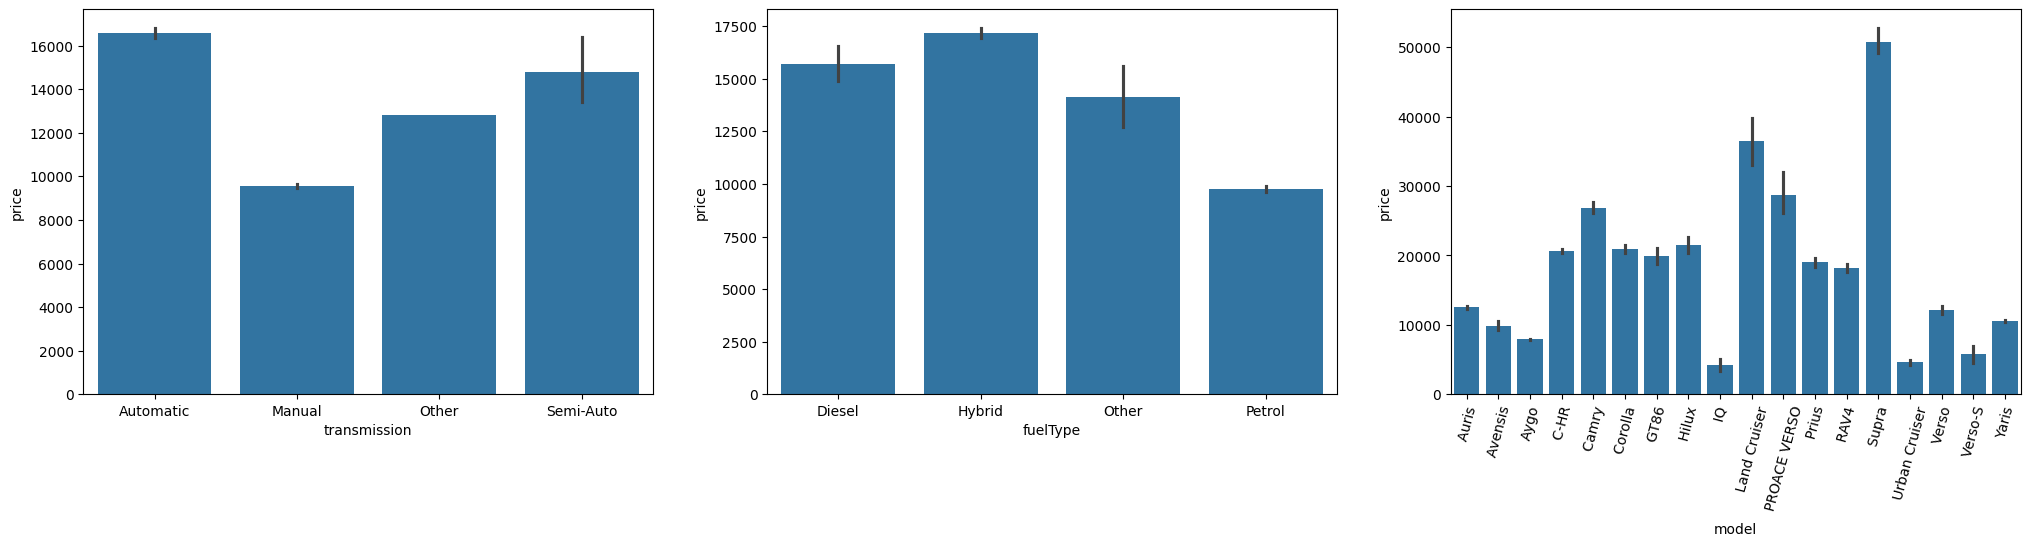

In [ ]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.barplot(data=data, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()

In [ ]:
fig,axes = plt.subplots(1,len(categorical_col), figsize=(25,5))

for n in range(len(categorical_col)):
    sns.scatterplot(data=data, x=categorical_col[n], y="price", ax=axes[n])
    plt.xticks(rotation=75)
plt.show()

In [ ]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


### Summary of exploration: 
We see that there is a relationship between the target variable, price, and engine size, mileage and year. 

There is no relationship between the price and transmission, fuel type, tax and model. 

Since there are a limited number of unique values of enigne size, this variable can be regarded as cateogorical. Lets see if we can find some more relationships: 

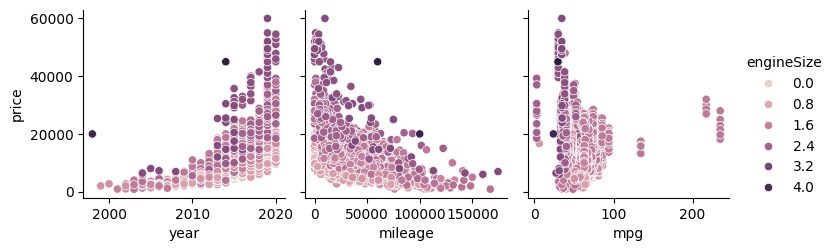

In [ ]:
sns.pairplot(data=data, y_vars="price", x_vars=["year", "mileage", "mpg"], hue="engineSize")

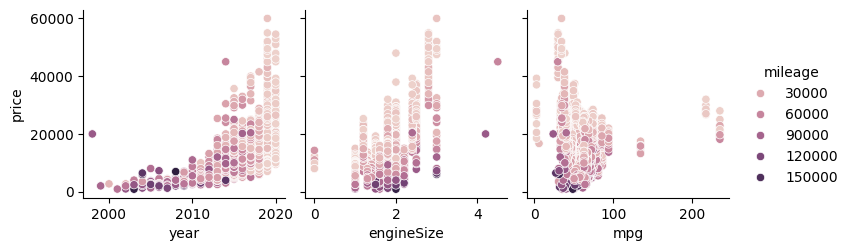

In [70]:
sns.pairplot(data=data, y_vars="price", x_vars=["year", "engineSize", "mpg"], hue="mileage")

# Model development: 
- what type of problem is this
- fit a baseline model
- fit a comparison model
- show how they compare

# Definition of a metric for the business to monitor: 
- how can the business monitor what they want to achieve
- estimate initial values for the metric based on current data
- final summary including recommendations the business should undertake